In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tech4alltraining/aiml/refs/heads/main/datasets/classification/adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
num_col = df.select_dtypes(include=['int64']).columns.tolist()                  # groups all numerical columns
catg_col = df.select_dtypes(include=['object']).columns.tolist()                # groups all categorical columns

print("Numeric Columns:", num_col)
print("Categorical Columns:", catg_col)

Numeric Columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Categorical Columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [8]:
# returns all the unique values of each categorical columns
for i in catg_col:
  print("Column: ",i)
  print(df[i].unique())

Column:  workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Column:  education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Column:  marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Column:  occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Column:  relationship
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
Column:  race
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
Column:  sex
['Female' 'Male']
Column:  native.country
['United-States' '?' 'Mexico' 'Greec

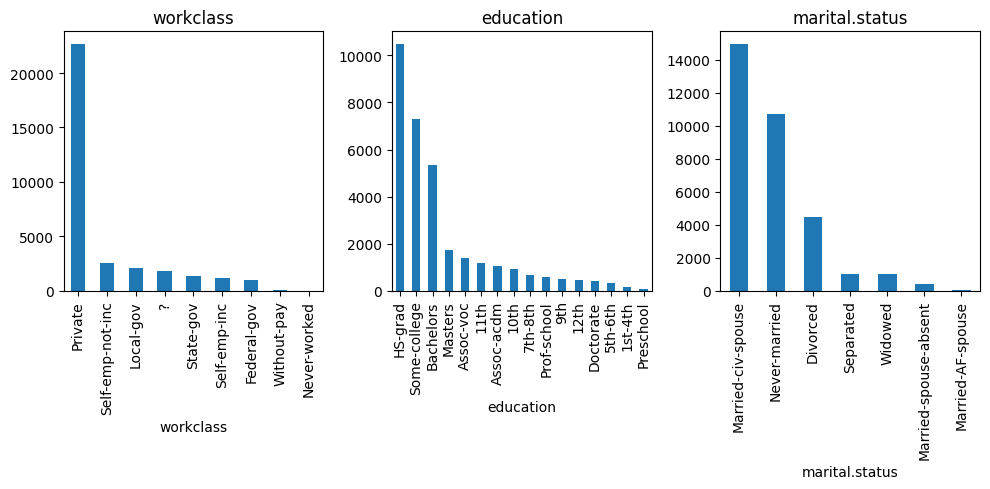

In [9]:
# bar-plot of 3 categorical columns
plt.figure(figsize=(10, 5))

for i, col in enumerate(['workclass', 'education', 'marital.status']):          # enumerate returns the index pos and the column name
    plt.subplot(1, 3, i+1)                                                      # (no. of rows, no. of columns, iteration of each col.)
    df[col].value_counts().plot(kind='bar')                                     # plots bar graph
    plt.title(col)
    plt.xticks(rotation=90)

plt.tight_layout()                                                              # adjust the space btwn the graphs
plt.show()

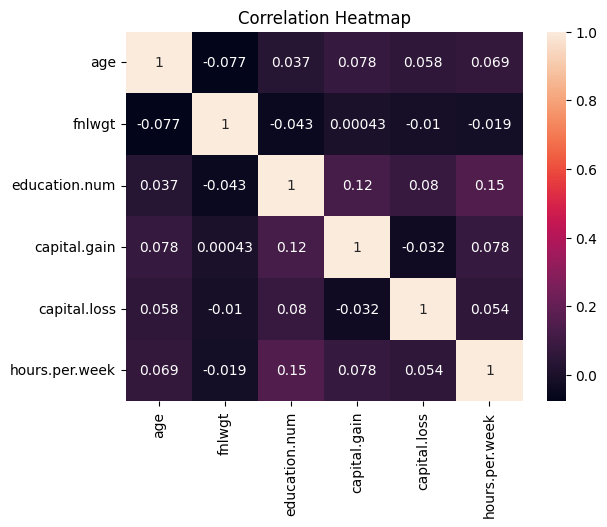

In [10]:
# returns correlation heatmap
sns.heatmap(df[num_col].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

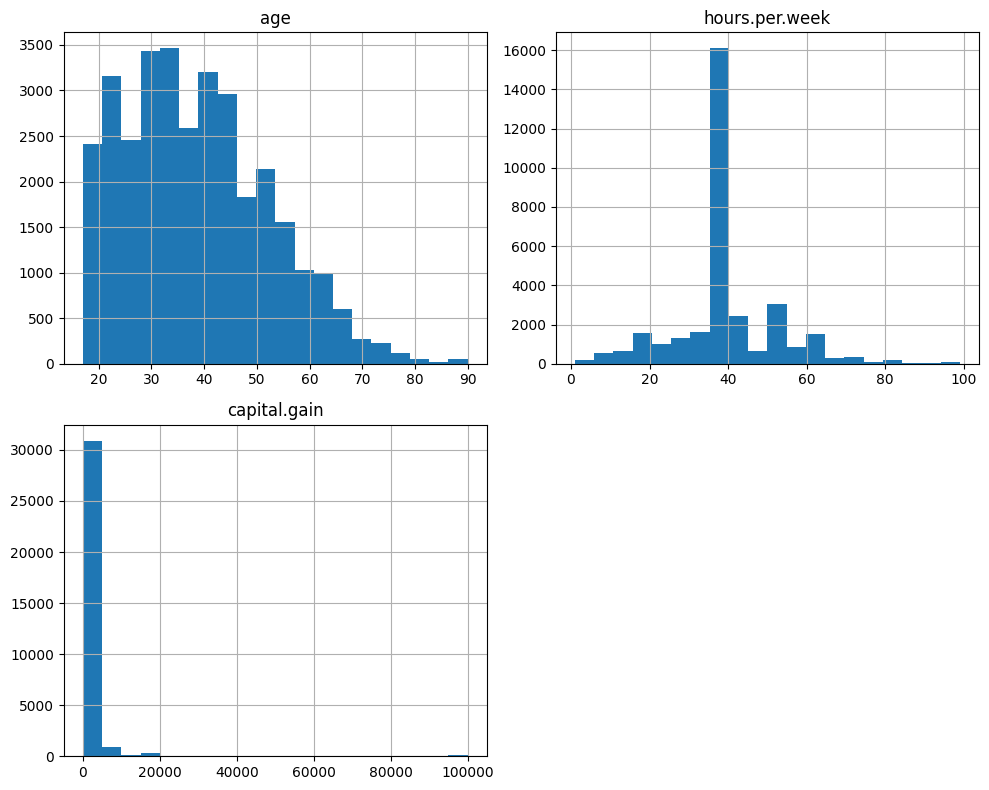

In [11]:
# Histograms for 3 numeric columns
df[['age', 'hours.per.week', 'capital.gain']].hist(bins=20, figsize=(10, 8))    # bin -> splits data into 20 bins per col.
plt.tight_layout()                                                              # adjust the space btwn the graphs
plt.show()

In [12]:
df = df.replace('?',np.nan)                                                     # replace '?' with NaN value
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [13]:
#checking for null value count in categorical columns
for i in catg_col:
  print(df[i].isna().value_counts())                                            # false -> no null value
  print()                                                                       # true -> null value

workclass
False    30725
True      1836
Name: count, dtype: int64

education
False    32561
Name: count, dtype: int64

marital.status
False    32561
Name: count, dtype: int64

occupation
False    30718
True      1843
Name: count, dtype: int64

relationship
False    32561
Name: count, dtype: int64

race
False    32561
Name: count, dtype: int64

sex
False    32561
Name: count, dtype: int64

native.country
False    31978
True       583
Name: count, dtype: int64

income
False    32561
Name: count, dtype: int64



In [14]:
#replaces all null values in categorical col. with mode value
for i in catg_col:
  df[i] = df[i].fillna(df[i].mode()[0])

In [15]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [16]:
#returns the number of duplicated rows
df.duplicated().sum()

np.int64(24)

In [17]:
#drops all duplicated rows
df.drop_duplicates(inplace=True)

In [18]:
#returns the number of duplicated rows
df.duplicated().sum()

np.int64(0)

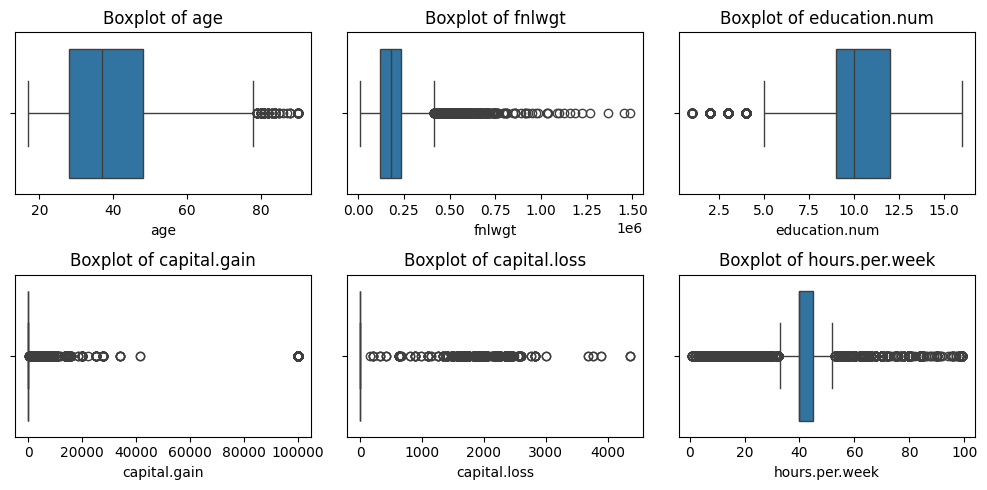

In [19]:
plt.figure(figsize=(10, 5))

# Create a boxplot for each numeric column
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 3, i)                                                        # (no. of rows, no. of columns, iteration of each col.)
    sns.boxplot(x=df[col])                                                      # horizontal boxplot
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [20]:
for col in num_col:
    Q1, Q3 = np.percentile(df[col], [25, 75])
    IQR = Q3 - Q1
    lb = Q1 - (1.5 * IQR)
    ub = Q3 + (1.5 * IQR)

    # Keep only non-outlier rows
    df = df[(df[col] >= lb) & (df[col] <= ub)]

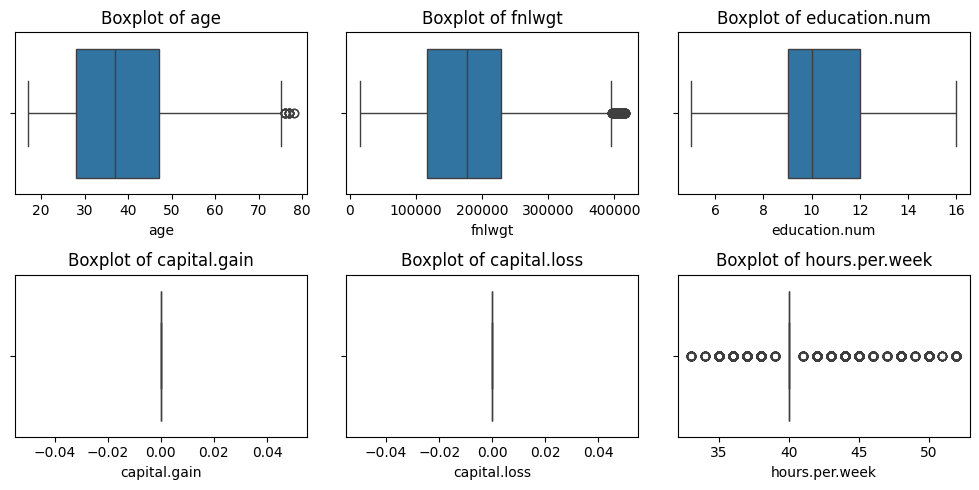

In [21]:
plt.figure(figsize=(10, 5))

# Create a boxplot for each numeric column
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 3, i)                                                        # (no. of rows, no. of columns, iteration of each col.)
    sns.boxplot(x=df[col])                                                      # horizontal boxplot
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in catg_col:
  df[i] = le.fit_transform(df[i])

In [23]:
df                                                                              # 0 -> Male , 1 -> Female

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,38,3,215646,8,9,0,5,1,4,1,0,0,40,37,0
4233,53,3,234721,1,7,2,5,0,2,1,0,0,40,37,0
4234,28,3,338409,6,13,2,9,5,2,0,0,0,40,4,0
4235,37,3,284582,9,14,2,3,5,4,0,0,0,40,37,0
4237,52,5,209642,8,9,2,3,0,4,1,0,0,45,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,3,321865,9,14,2,3,0,4,1,0,0,40,37,1
32556,22,3,310152,11,10,4,10,1,4,1,0,0,40,37,0
32557,27,3,257302,4,12,2,12,5,4,0,0,0,38,37,0
32558,40,3,154374,8,9,2,6,0,4,1,0,0,40,37,1


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['fnlwgt'] = scaler.fit_transform(df[['fnlwgt']])

In [25]:
# stores modified data
df.to_csv("m_adult.csv", index=False)

In [26]:

df = pd.read_csv('/content/m_adult.csv')
df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,38,3,0.401116,8,9,0,5,1,4,1,0,0,40,37,0
1,53,3,0.620159,1,7,2,5,0,2,1,0,0,40,37,0
2,28,3,1.810833,6,13,2,9,5,2,0,0,0,40,4,0
3,37,3,1.192725,9,14,2,3,5,4,0,0,0,40,37,0
4,52,5,0.332170,8,9,2,3,0,4,1,0,0,45,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18986,53,3,1.620854,9,14,2,3,0,4,1,0,0,40,37,1
18987,22,3,1.486351,11,10,4,10,1,4,1,0,0,40,37,0
18988,27,3,0.879462,4,12,2,12,5,4,0,0,0,38,37,0
18989,40,3,-0.302485,8,9,2,6,0,4,1,0,0,40,37,1


In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('income',axis=1)
y = df['income']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train.shape

(15192, 14)

In [29]:
X_test.shape

(3799, 14)

In [30]:
import joblib                                                                   # library used to save the trained model

*Logistic* Regression

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
LR_pred = model.predict(X_test)

joblib.dump(model,'LR.pkl')

['LR.pkl']


 KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
KNN_pred = model.predict(X_test)

joblib.dump(model,'KNN.pkl')

['KNN.pkl']

SVM

In [33]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
SVM_pred = model.predict(X_test)

joblib.dump(model,'SVM.pkl')

['SVM.pkl']

Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
NB_pred = model.predict(X_test)

joblib.dump(model,'NB.pkl')

['NB.pkl']

Decesion Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
DT_pred = model.predict(X_test)

joblib.dump(model,'DT.pkl')

['DT.pkl']

Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier() #default 100
model.fit(X_train, y_train)
RF_pred = model.predict(X_test)

joblib.dump(model,'RF.pkl')

['RF.pkl']

MLP

In [37]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=500)
model.fit(X_train, y_train)
MLP_pred = model.predict(X_test)

joblib.dump(model,'MLP.pkl')

['MLP.pkl']

Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
GB_pred = model.predict(X_test)

joblib.dump(model,'GB.pkl')

['GB.pkl']

XGB

In [39]:

from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)
XGB_pred = model.predict(X_test)

joblib.dump(model,'XGB.pkl')

['XGB.pkl']

In [40]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

 Logistic Regression
Accuracy: 0.8125822584890761
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2986
           1       0.63      0.29      0.40       813

    accuracy                           0.81      3799
   macro avg       0.73      0.62      0.65      3799
weighted avg       0.79      0.81      0.78      3799



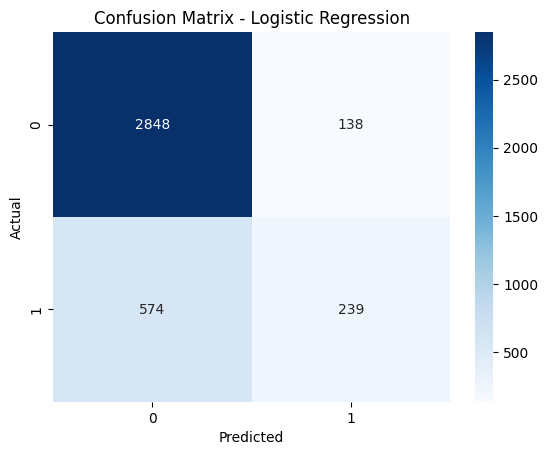

In [41]:
print(" Logistic Regression")
print("Accuracy:", accuracy_score(y_test, LR_pred))
print(classification_report(y_test, LR_pred))

cm = confusion_matrix(y_test, LR_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 k-Nearest Neighbors
Accuracy: 0.803369307712556
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2986
           1       0.55      0.45      0.49       813

    accuracy                           0.80      3799
   macro avg       0.70      0.67      0.69      3799
weighted avg       0.79      0.80      0.80      3799



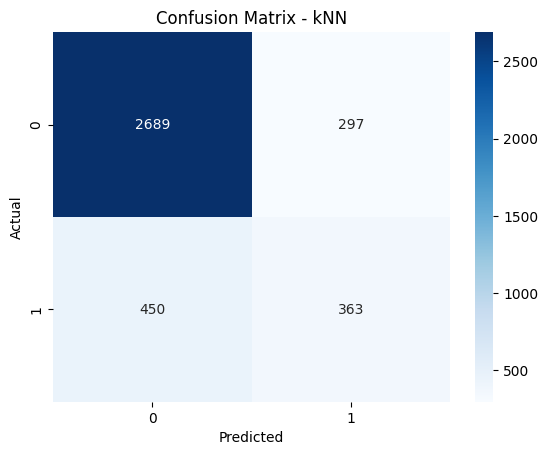

In [42]:
print(" k-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, KNN_pred))
print(classification_report(y_test, KNN_pred))

cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - kNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 Support Vector Machine
Accuracy: 0.7859963148196893
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2986
           1       0.50      0.00      0.00       813

    accuracy                           0.79      3799
   macro avg       0.64      0.50      0.44      3799
weighted avg       0.72      0.79      0.69      3799



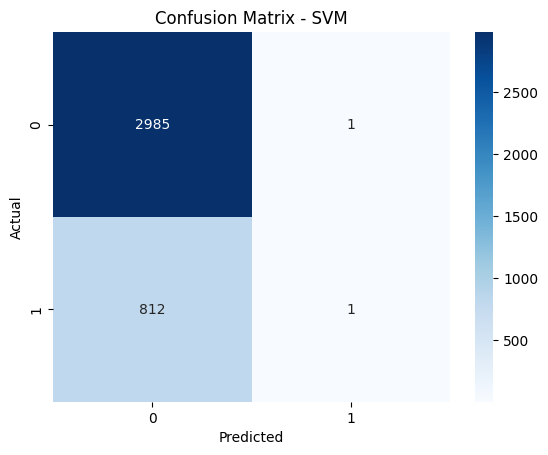

In [43]:
print(" Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, SVM_pred))
print(classification_report(y_test, SVM_pred))

cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 Naive Bayes
Accuracy: 0.7831008160042117
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      2986
           1       0.49      0.64      0.56       813

    accuracy                           0.78      3799
   macro avg       0.69      0.73      0.71      3799
weighted avg       0.81      0.78      0.79      3799



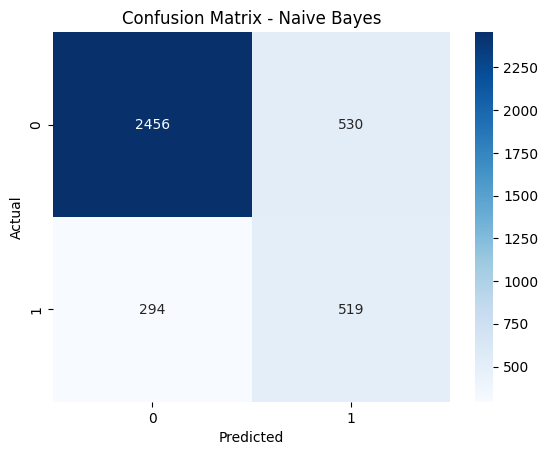

In [44]:
print(" Naive Bayes")
print("Accuracy:", accuracy_score(y_test, NB_pred))
print(classification_report(y_test, NB_pred))

cm = confusion_matrix(y_test, NB_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 Decision Tree
Accuracy: 0.782047907344038
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2986
           1       0.49      0.48      0.49       813

    accuracy                           0.78      3799
   macro avg       0.68      0.67      0.67      3799
weighted avg       0.78      0.78      0.78      3799



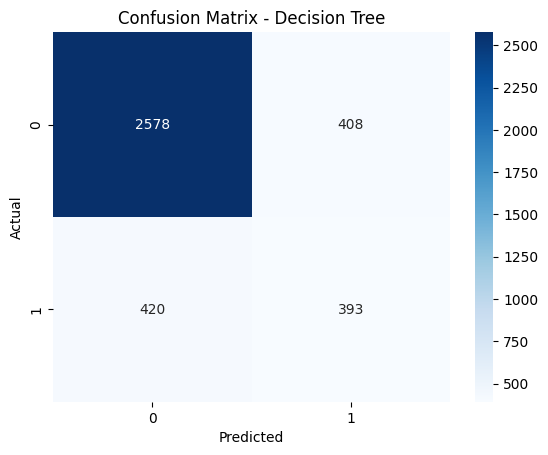

In [45]:
print(" Decision Tree")
print("Accuracy:", accuracy_score(y_test, DT_pred))
print(classification_report(y_test, DT_pred))

cm = confusion_matrix(y_test, DT_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 Random Forest
Accuracy: 0.8236377994209002
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2986
           1       0.62      0.46      0.53       813

    accuracy                           0.82      3799
   macro avg       0.74      0.69      0.71      3799
weighted avg       0.81      0.82      0.81      3799



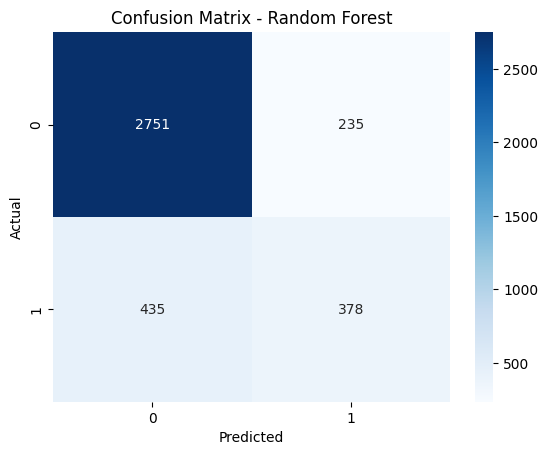

In [46]:
print(" Random Forest")
print("Accuracy:", accuracy_score(y_test, RF_pred))
print(classification_report(y_test, RF_pred))

cm = confusion_matrix(y_test, RF_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 MLP Classifier
Accuracy: 0.8333772045275072
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2986
           1       0.66      0.46      0.54       813

    accuracy                           0.83      3799
   macro avg       0.76      0.70      0.72      3799
weighted avg       0.82      0.83      0.82      3799



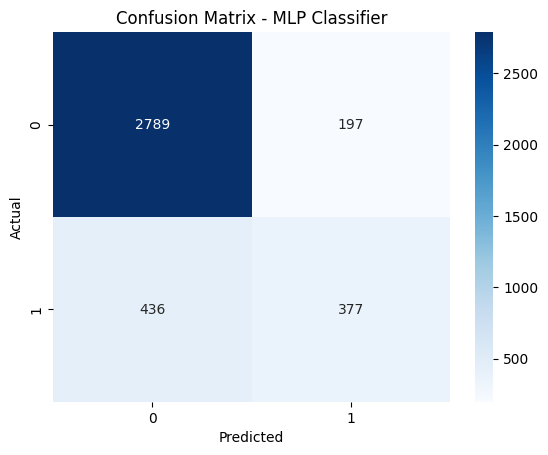

In [47]:
print(" MLP Classifier")
print("Accuracy:", accuracy_score(y_test, MLP_pred))
print(classification_report(y_test, MLP_pred))

cm = confusion_matrix(y_test, MLP_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 Gradient Boosting
Accuracy: 0.8449591997894182
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2986
           1       0.70      0.48      0.57       813

    accuracy                           0.84      3799
   macro avg       0.78      0.71      0.74      3799
weighted avg       0.83      0.84      0.83      3799



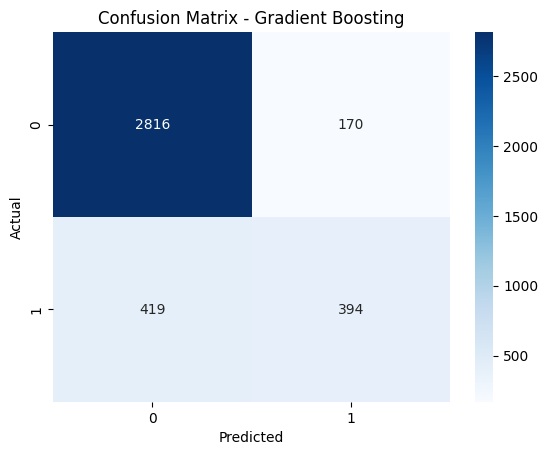

In [48]:
print(" Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, GB_pred))
print(classification_report(y_test, GB_pred))

cm = confusion_matrix(y_test, GB_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 XGBoost Classifier
Accuracy: 0.8317978415372467
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2986
           1       0.64      0.50      0.56       813

    accuracy                           0.83      3799
   macro avg       0.75      0.71      0.73      3799
weighted avg       0.82      0.83      0.82      3799



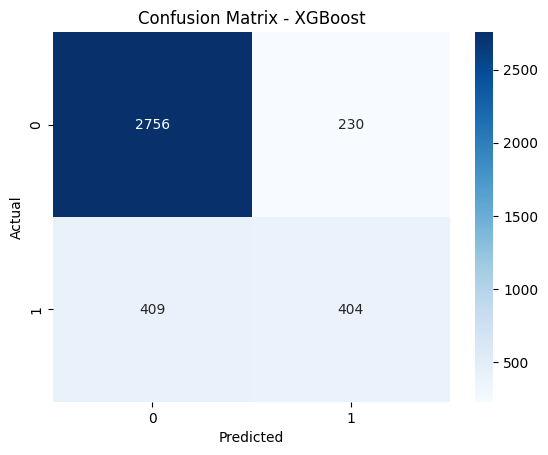

In [49]:
print(" XGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, XGB_pred))
print(classification_report(y_test, XGB_pred))

cm = confusion_matrix(y_test, XGB_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# hyperparameter tuning

In [50]:
# kNN hyperparameter tuning
for k in [3, 5, 7, 9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    KNN_pred = model.predict(X_test)

    print(f"k-Nearest Neighbors for {k}")
    print("Accuracy:", accuracy_score(y_test, KNN_pred))
    print(classification_report(y_test, KNN_pred))


k-Nearest Neighbors for 3
Accuracy: 0.7965254014214267
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2986
           1       0.53      0.46      0.49       813

    accuracy                           0.80      3799
   macro avg       0.69      0.67      0.68      3799
weighted avg       0.79      0.80      0.79      3799

k-Nearest Neighbors for 5
Accuracy: 0.803369307712556
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2986
           1       0.55      0.45      0.49       813

    accuracy                           0.80      3799
   macro avg       0.70      0.67      0.69      3799
weighted avg       0.79      0.80      0.80      3799

k-Nearest Neighbors for 7
Accuracy: 0.8060015793629902
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2986
           1       0.56      0.45      0.50       813

    accuracy      

In [51]:
# SVC hyperparameter tuning
for k in ['linear', 'rbf', 'poly']:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    SVC_pred = model.predict(X_test)

    print(f"Support Vector Machine for k={k}")
    print("Accuracy:", accuracy_score(y_test, SVM_pred))
    print(classification_report(y_test, SVM_pred))


Support Vector Machine for k=linear
Accuracy: 0.7859963148196893
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2986
           1       0.50      0.00      0.00       813

    accuracy                           0.79      3799
   macro avg       0.64      0.50      0.44      3799
weighted avg       0.72      0.79      0.69      3799

Support Vector Machine for k=rbf
Accuracy: 0.7859963148196893
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2986
           1       0.50      0.00      0.00       813

    accuracy                           0.79      3799
   macro avg       0.64      0.50      0.44      3799
weighted avg       0.72      0.79      0.69      3799

Support Vector Machine for k=poly
Accuracy: 0.7859963148196893
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2986
           1       0.50      0.00      0.00    

In [52]:
# Random-Forest hyperparameter tuning
for n in [50, 100, 150]:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    RF_pred = model.predict(X_test)

    print(f"Random Forest for n={n}")
    print("Accuracy:", accuracy_score(y_test, RF_pred))
    print(classification_report(y_test, RF_pred))


Random Forest for n=50
Accuracy: 0.8267965254014215
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2986
           1       0.62      0.48      0.54       813

    accuracy                           0.83      3799
   macro avg       0.75      0.70      0.72      3799
weighted avg       0.81      0.83      0.82      3799

Random Forest for n=100
Accuracy: 0.8257436167412477
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2986
           1       0.62      0.47      0.54       813

    accuracy                           0.83      3799
   macro avg       0.74      0.70      0.71      3799
weighted avg       0.81      0.83      0.82      3799

Random Forest for n=150
Accuracy: 0.8267965254014215
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2986
           1       0.62      0.48      0.54       813

    accuracy            

### 🔍 Classifier Performance Comparison

| **Model**             | **Hyperparameter(s)** | **Accuracy (%)** | **Precision** | **Recall** | **F1-Score** |
|-----------------------|------------------------|------------------|---------------|------------|--------------|
| Logistic Regression   | —                      | 81.3             | 0.79          | 0.81       | 0.78         |
| kNN                   | —                      | 80.3             | 0.79          | 0.80       | 0.80         |
| SVM                   | —                      | 78.6             | 0.62          | 0.79       | 0.69         |
| Naive Bayes           | —                      | 78.3             | 0.81          | 0.78       | 0.79         |
| Decision Tree         | —                      | 78.0             | 0.78          | 0.78       | 0.78         |
| Random Forest         | —                      | 82.97            | 0.82          | 0.83       | 0.82         |
| MLP Classifier        | —                      | 83.36            | 0.82          | 0.83       | 0.82         |
| Gradient Boosting     | —                      | 84.50            | 0.83          | 0.84       | 0.83         |
| XGBoost Classifier    | —                      | 83.18            | 0.82          | 0.83       | 0.82         |

<br>

#### ✅ Summary:
- **Gradient Boosting** achieved the highest **accuracy (84.5%)** and strong overall performance.
- **MLP, XGBoost, and Random Forest** also performed competitively, all with F1-scores around **0.82–0.83**.
- **Naive Bayes and Decision Tree** showed balanced results but slightly lower than ensemble methods.
- **SVM** underperformed in this case, with significantly lower precision and F1-score due to failing to classify class `1`.

